In [24]:
from keras.models import Sequential 
from keras.datasets import mnist
from keras.layers import Dense , Activation 
from keras.optimizers import Adam

In [20]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

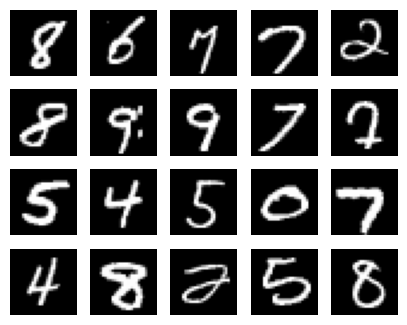

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
index = np.random.randint(0, x_train.shape[0], size = 20)
images = x_train[index]
lables = y_train[index]

plt.figure(figsize=(5,5))

for i in range(len(index)):
    plt.subplot(5,5, i+1)
    image = images[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
plt.show()    


In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
image_size= x_test.shape[1]
input_size = image_size * image_size
input_size

784

In [21]:
x_train = np.reshape(x_train , [-1 , input_size]) #  flatten 
x_train = x_train.astype("float32")/255
x_test = np.reshape(x_test , [-1 , input_size]) #  flatten 
x_test = x_test.astype("float32")/255


In [22]:
x_test.shape

(10000, 784)

In [23]:
hidden_units= 256

In [25]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation("relu"))

model.add(Dense(hidden_units))
model.add(Activation("relu"))

model.add(Dense(hidden_units))
model.add(Activation("relu"))


model.add(Dense(10))
model.add(Activation("softmax"))

c:\Users\Yasmine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= "sparse_categorical_crossentropy", 
              
              metrics =["accuracy"]
              )

In [29]:
model.fit(x_train, y_train , epochs=5 , batch_size= 360 , validation_split= 0.2)

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7844 - loss: 0.7548 - val_accuracy: 0.9536 - val_loss: 0.1576
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9562 - loss: 0.1505 - val_accuracy: 0.9658 - val_loss: 0.1182
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9738 - loss: 0.0896 - val_accuracy: 0.9709 - val_loss: 0.1008
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9821 - loss: 0.0630 - val_accuracy: 0.9729 - val_loss: 0.0934
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9754 - val_loss: 0.0868


In [30]:
loss , acc = model.evaluate(x_test , y_test , batch_size=360)
print(loss )
print(acc )

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9718 - loss: 0.0948
0.0826718881726265
0.9757000207901001
